# Heart diseases UCI dataset:


Context:

This database contains 76 attributes, but all published experiments refer to it using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0(no presence) to 4.

Content:

Attribute Information:
1. age: The person's age in years
2. sex: The person's sex (1 = male, 0 = female)
3. cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
4. trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
5. chol: The person's cholesterol measurement in mg/dl
6. fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
7. restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
8. thalach: The person's maximum heart rate achieved
9. exang: Exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
11. slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
12. ca: The number of major vessels (0-3)
13. thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
14. target: Heart disease (0 = no, 1 = yes)

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#Scikit learn libraries
from sklearn.neighbors import KNeighborsClassifier #KNN Classifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

heart = pd.read_csv("heart.csv")

heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


C:\Users\msi1\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\msi1\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


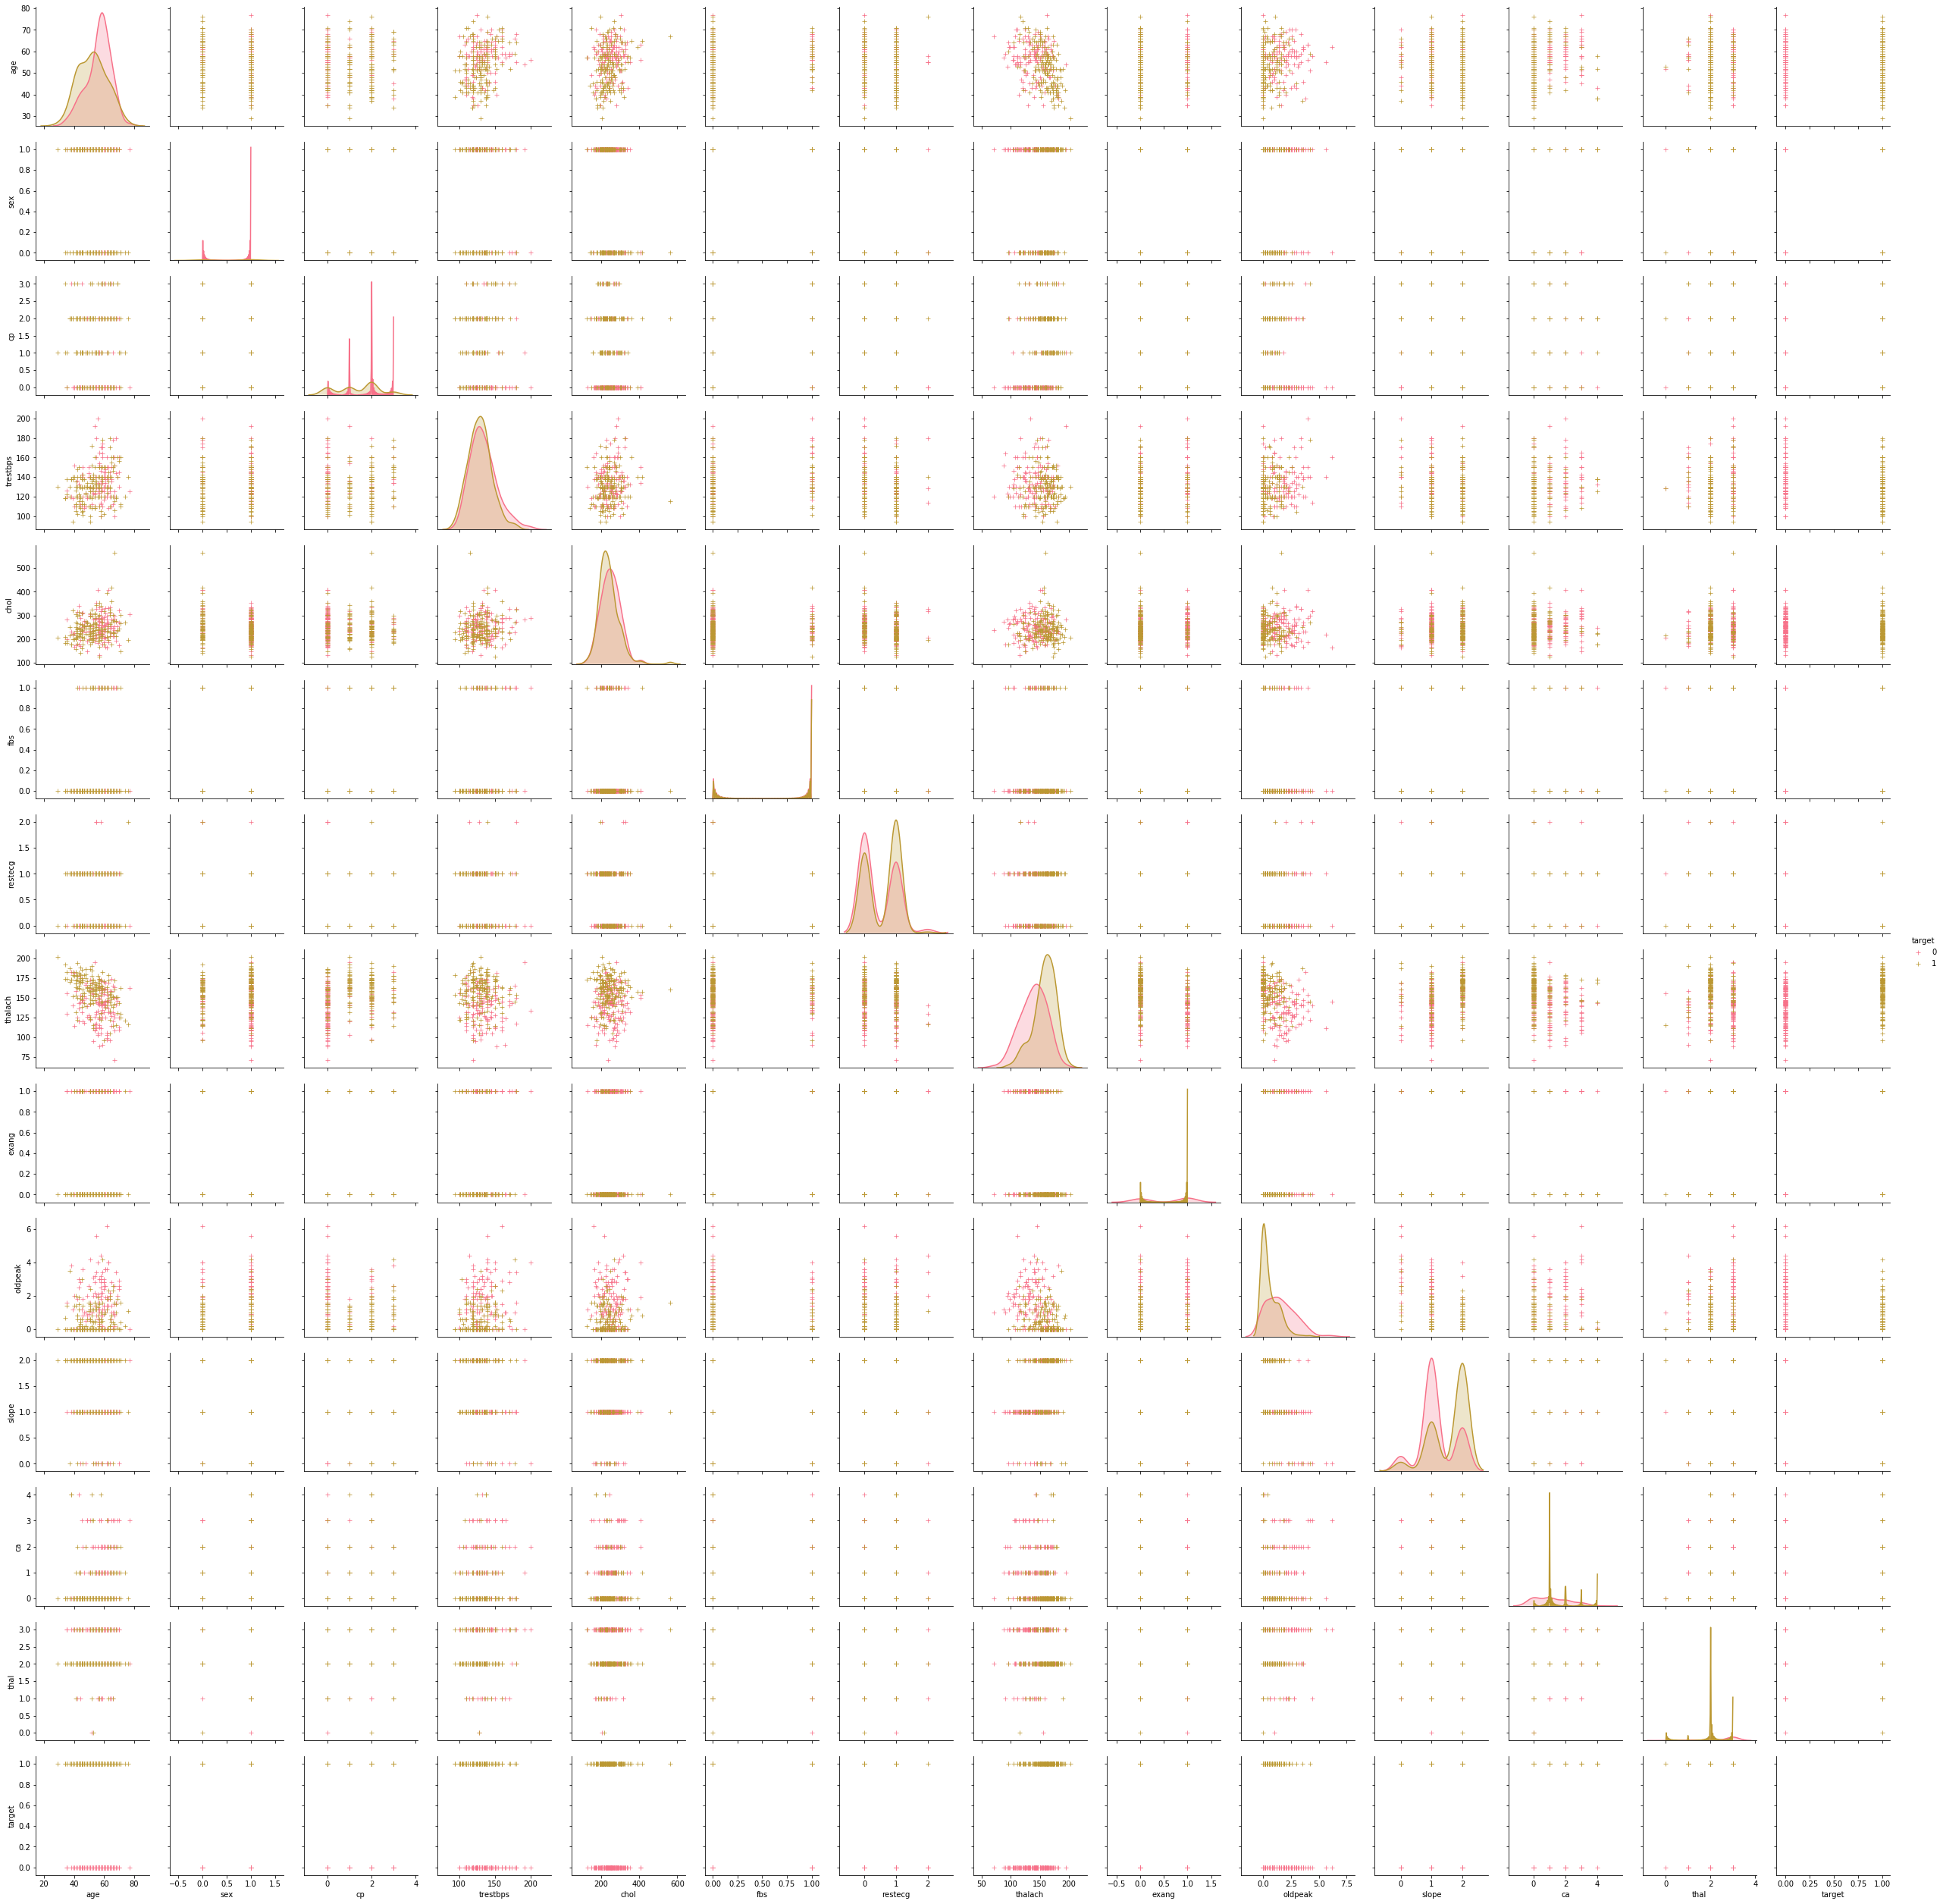

In [2]:
#Pair-plots
sns.set_palette('husl')
sns.pairplot(heart, hue='target', markers='+')
plt.show()

In [3]:
#Setting features and labels
X = heart.iloc[:, :-1].values
Y = heart.iloc[:, -1].values

#Setting training and testing data
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.15, random_state=0)

#Making and fitting the classifier
clf = KNeighborsClassifier()
clf.fit(X_Train, Y_Train)

#Predicting target results from X_Test and comparing them to Y_Test
Y_Predict = clf.predict(X_Test)

print("The mean squared error is:", mean_squared_error(Y_Test, Y_Predict))

The mean squared error is: 0.32608695652173914


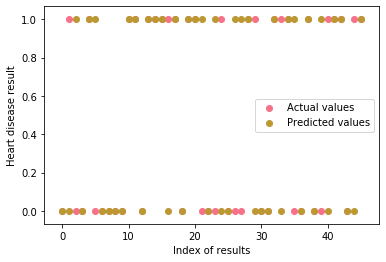

In [4]:
#Plotting a graph between actual values and predicted values
plt.scatter(range(len(Y_Test)), Y_Test, label="Actual values")
plt.scatter(range(len(Y_Test)), Y_Predict, label="Predicted values")

plt.ylabel("Heart disease result")
plt.xlabel("Index of results")
plt.legend(loc="right")
plt.show()

In [5]:
from sklearn.metrics import accuracy_score

print("Accuracy Score:", accuracy_score(Y_Test, Y_Predict))

Accuracy Score: 0.6739130434782609


In [6]:
#Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

LRC = LogisticRegression()

LRC.fit(X_Train, Y_Train)

#Predicting with dataset
Y_Predict_LRC = LRC.predict(X_Test)

C:\Users\msi1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [7]:
print("Accuracy Score:", accuracy_score(Y_Test, Y_Predict_LRC))

Accuracy Score: 0.8695652173913043
